# Torsional Oscillator Experiments 
## Josh Berg and Aaron Titus, High Point University

### Experiment 1.3:  Periods of oscillation: modeling rotational inertia 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #used for graphing

In [14]:
#show graphs inline (do not use for print publication quality graphs)
%matplotlib inline

This experiment examines the simplest dynamic measurements of the Torsional Oscillator. It  focuses on the measurement for the period, $T$. The period is independent of the amplitude of oscillation. Knowing the equation for the period for a mass on a string,

$$T = 2\pi\sqrt{\frac{m}{k}}$$
        
which permits the assumption that the result for this kind of rotational motion is: 

$$T = 2\pi\sqrt{\frac{I}{\kappa}}$$ 
         
where $\kappa$ represents the torsion constant that was calculated in experiment 1.1 and $I$ is the rotational inertia of the rotating system. To test this assumption, the (statically) measured value of $\kappa$ and precisely modeled contributions to $I$ through the addition of brass bars to the rotor (Image 1 below). The following equation was used: 

$$I = I_0 +n\Delta I$$
        
where $I_0$ is the rotational inertia of the rotor as is, $n$ is the number of brass quadrants and $\Delta I$ is the added rotational inertial contributed by one brass quadrant. These calculated values of I can be used to predict the T values for equation 2. This is done inserting the equation for $I$ into equation 2, which can be graphed and the slope is the value for $\kappa$.

![alt text](CIMG0009.JPG "Image 1")

The image above shows 2 brass bars resting on the rotor. 

In [15]:
# Read data file and define dataframe object (df for dataframe)
df_all = pd.read_table('Experiment1_3.txt')

In [16]:
#print first five rows of data with the header
df_all.head(7)

,Number of bars (n),Time (s),Cycles,Mass of bars (kg)
0,0,16.16,14,0.000
1,2,16.90,13,0.429
2,4,17.25,12,0.858
3,6,17.14,11,1.287
4,8,15.09,9,1.716


In [17]:
#Create an arrays and define constants 
Time = np.array(df_all['Time (s)'].tolist())
Cycles = np.array(df_all['Cycles'].tolist())
n = np.array(df_all['Number of bars (n)'].tolist())
bars_mass = np.array(df_all['Mass of bars (kg) '].tolist())
single_bar = 0.2145 #kg 
r_1 = 0.043688 
r_2 = 0.094488 
half_r1 = r_1/2
half_r2 = r_2/2
inside = ((half_r1*half_r1)+(half_r2*half_r2))

#Calculations 
Period = Time/Cycles
n_I = (bars_mass/2)*inside
Left = (Period/(np.pi*2))*(Period/(np.pi*2))
print(Left)

[ 0.03374947  0.0428082   0.05234268  0.0615002   0.07120881]


The Moment of Inertia for a single bar was calculated through the following equation: 

$$I_{z,bar} = (M/2)(r_1^2 + r_2^2)$$
            
The Total Inertia 

$$I = I_d+ I_b$$ 

$$= I_d + n(\Delta I_b)$$
        

$$(Left) = \frac{I}{\kappa} = \frac{I_d}{\kappa} + n\frac{\Delta I_b}{\kappa}$$

"b" stands for brass bar and "d" stands for the rotor disk 

In [18]:
#rows, columns of data table
df_all.shape

(5, 4)

In [19]:
from scipy.optimize import curve_fit

In [20]:
#function takes an array of x values and returns an array of y values
#  where y=mx+b
def func(x, m, b):
    return m*x +b #linear function

constants, stats = curve_fit(func,n,Left)

#constants is a list
mbest=constants[0] #slope
bbest=constants[1] #intercept

ybest=func(n,mbest,bbest) #y values for best fit function

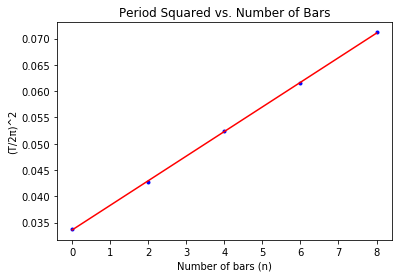

Best fit: m= 0.00468053433317  and b= 0.0335997340925


In [21]:
#plot graph
fig2 = plt.figure()
plt.title('Period Squared vs. Number of Bars')
plt.xlabel('Number of bars (n)')
plt.ylabel('(T/2π)^2')
plt.plot(n,Left,'b.',n,ybest,'r-')
plt.show()
print("Best fit: m=",mbest," and b=",bbest)

The slope "m" is our $\frac{\Delta I_{bar}}{\kappa}$.

In [22]:
dI_bar = (single_bar/2)*((r_1*r_1)+(r_2*r_2)) 
print(dI_bar)

0.001162227869088


In [23]:
#slope = dI_bar / k therefore k = dI_bar/slope
slope = .00455
k = (dI_bar/slope)/4 #we divide by four to account for the ratio radii that we squared! 
print(k)

0.06385867412571428


Our $\kappa$ value shown above is slightly larger than the the value we found in experiment 1_1 (0.05873) this is because of the tiny holes in the bar (shown in image 2) which ultimately effects the ∆I value. If we were to account for the tiny holes, the values would more than likely be the same; however, this was ignored because there is only a 9percent error between the two k values. 

![alt text](CIMG0010.JPG "Image 2")

By using the intercept of the plot $bbest$, we can deduce a value for $I_0$ (the rotational inertia of the unadorned rotor) which is

$$bbest=\frac{I_{d}}{\kappa}$$

Thus, the moment of inertia is

$$I_0 = \kappa b$$

In [24]:
Idisk=k*bbest
print("I_disk = ",Idisk," kg m^2")

I_disk =  0.00214563447013  kg m^2
